## Playing around with very clean data

In [2]:
# Import tensorflow

import tensorflow as tf
print(tf.__version__)

2.0.0


### Let's play around with MNIST dataset

In [4]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

11493376/11490434 [==============================] - 4s 0us/step


In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [8]:
# Build the tf.keras.Sequential model by stacking layers:

def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='Adam', 
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    
    return model

model = create_model()

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(X_train, y_train, epochs=7, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/7
60000/60000 [==============================] - 27s 448us/sample - loss: 0.2963 - accuracy: 0.9143 - val_loss: 0.1377 - val_accuracy: 0.9599
Epoch 2/7
60000/60000 [==============================] - 8s 127us/sample - loss: 0.1413 - accuracy: 0.9581 - val_loss: 0.1064 - val_accuracy: 0.9655
Epoch 3/7
60000/60000 [==============================] - 8s 132us/sample - loss: 0.1061 - accuracy: 0.9674 - val_loss: 0.0910 - val_accuracy: 0.9718
Epoch 4/7
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0864 - accuracy: 0.9733 - val_loss: 0.0757 - val_accuracy: 0.9763
Epoch 5/7
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0748 - accuracy: 0.9769 - val_loss: 0.0753 - val_accuracy: 0.9757
Epoch 6/7
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0643 - accuracy: 0.9800 - val_loss: 0.0704 - val_accuracy: 0.9793
Epoch 7/7
60000/60000 [==============================] 

In [13]:
model.save('mnist.h5')

In [17]:
history.history

{'loss': [0.29634511332015195,
  0.1413365182461838,
  0.1061110430367291,
  0.08639717745942374,
  0.07480542014793803,
  0.06428426162277659,
  0.0568853520952786],
 'accuracy': [0.91425,
  0.95806664,
  0.9673667,
  0.9733,
  0.97686666,
  0.97995,
  0.98125],
 'val_loss': [0.1376977234594524,
  0.1063707796068862,
  0.09097005187915638,
  0.07571121849482879,
  0.07526835805564187,
  0.07043936887963209,
  0.06978463786970825],
 'val_accuracy': [0.9599, 0.9655, 0.9718, 0.9763, 0.9757, 0.9793, 0.9774]}

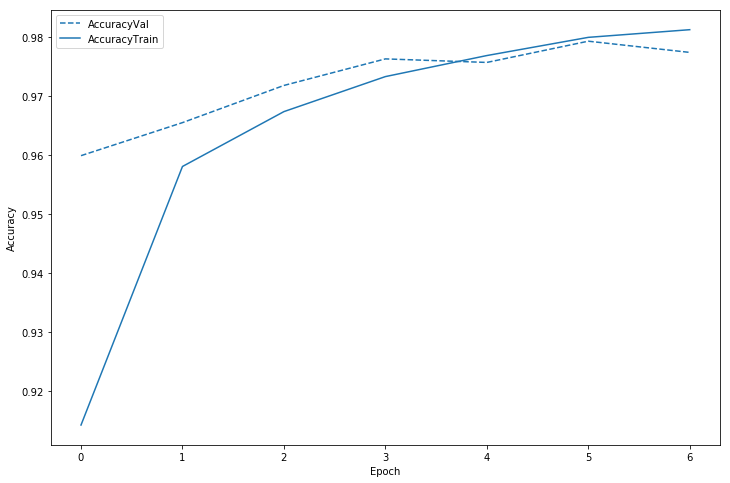

In [21]:
import matplotlib.pyplot as plt

# Visualize model history

def plot_history(history, key='loss'):
    plt.figure(figsize=(12,8))
    val = plt.plot(history.epoch, history.history['val_' + key],
                  '--', label=key.title() + 'Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
            label=key.title() + 'Train')
    plt.xlabel('Epoch')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()

plot_history(history, key='accuracy')

Let's create a tf.keras.callbacks.ModelCheckpoint callback that saves weights only during training, so we can use a trained model without having to retrain it, or pick-up training where you left off—in case the training process was interrupted.

In [22]:
import os

checkpoint_path = 'checkpoint.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
# by default it saves the weights every epoch

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                save_weights_only=True,
                                                verbose=1)


In [24]:
# Train the model with the new callback
history = model.fit(X_train,
                   y_train,
                   epochs=5,
                   validation_data=(X_test, y_test),
                   callbacks=[cp_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
59840/60000 [============================>.] - ETA: 0s - loss: 0.0530 - accuracy: 0.9824
Epoch 00001: saving model to checkpoint.ckpt
60000/60000 [==============================] - 10s 167us/sample - loss: 0.0530 - accuracy: 0.9824 - val_loss: 0.0743 - val_accuracy: 0.9785
Epoch 2/5
59776/60000 [============================>.] - ETA: 0s - loss: 0.0473 - accuracy: 0.9845
Epoch 00002: saving model to checkpoint.ckpt
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0472 - accuracy: 0.9845 - val_loss: 0.0709 - val_accuracy: 0.9789
Epoch 3/5
59680/60000 [============================>.] - ETA: 0s - loss: 0.0435 - accuracy: 0.9856
Epoch 00003: saving model to checkpoint.ckpt
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0436 - accuracy: 0.9855 - val_loss: 0.0696 - val_accuracy: 0.9800
Epoch 4/5
59776/60000 [============================>.] - ETA: 0s - loss: 0.0417 - accuracy: 0.9859
E

Now rebuild a fresh, untrained model, and evaluate it on the test set. An untrained model will perform at chance levels (~10% accuracy):

In [27]:
# Create a basic model instance
new_model = create_model()

# Evaluate the model
loss, acc = new_model.evaluate(X_test, y_test)
print("Untrained model, accuracy: {:5.2f}%".format(100*acc))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Untrained model, accuracy:  9.31%


Then load the weights from the checkpoint and re-evaluate



In [28]:
# Loads the weights
new_model.load_weights(checkpoint_path)

# Re-evaluate the model
loss, acc = new_model.evaluate(X_test, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Restored model, accuracy: 98.01%


Saving a fully-functional model is very useful—you can load them in TensorFlow.js (HDF5, Saved Model) and then train and run them in web browsers, or convert them to run on mobile devices using TensorFlow Lite (HDF5, Saved Model)

In [29]:
# Create a new model instance
model = create_model()

# Train the model
model.fit(X_train, y_train, epochs=5)

# Save the entire model to a HDF5 file
model.save('my_model.h5')

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 20s 340us/sample - loss: 0.2917 - accuracy: 0.9154
Epoch 2/5
60000/60000 [==============================] - 7s 115us/sample - loss: 0.1406 - accuracy: 0.9582
Epoch 3/5
60000/60000 [==============================] - 6s 108us/sample - loss: 0.1047 - accuracy: 0.9685
Epoch 4/5
60000/60000 [==============================] - 7s 109us/sample - loss: 0.0857 - accuracy: 0.9730
Epoch 5/5
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0749 - accuracy: 0.9766


Now, recreate the model from that file:

In [30]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## How to load and preprocess data in TF

In [31]:
import pathlib
data_root_orig = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='flower_photos', untar=True)
data_root = pathlib.Path(data_root_orig)
print(data_root)

228818944/228813984 [==============================] - 108s 0us/step
/home/khanh/.keras/datasets/flower_photos


In [32]:
for item in data_root.iterdir():
    print(item)

/home/khanh/.keras/datasets/flower_photos/dandelion
/home/khanh/.keras/datasets/flower_photos/LICENSE.txt
/home/khanh/.keras/datasets/flower_photos/daisy
/home/khanh/.keras/datasets/flower_photos/sunflowers
/home/khanh/.keras/datasets/flower_photos/roses
/home/khanh/.keras/datasets/flower_photos/tulips


In [33]:
import random
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
image_count

3670

In [35]:
all_image_paths[:10]

['/home/khanh/.keras/datasets/flower_photos/tulips/5603625247_e4ff1828af_m.jpg',
 '/home/khanh/.keras/datasets/flower_photos/roses/5799616059_0ffda02e54.jpg',
 '/home/khanh/.keras/datasets/flower_photos/dandelion/3454102259_957ecd0a9b.jpg',
 '/home/khanh/.keras/datasets/flower_photos/roses/14510185271_b5d75dd98e_n.jpg',
 '/home/khanh/.keras/datasets/flower_photos/tulips/2418823693_72eec80f42_n.jpg',
 '/home/khanh/.keras/datasets/flower_photos/roses/17040847367_b54d05bf52.jpg',
 '/home/khanh/.keras/datasets/flower_photos/roses/9353111163_7a89b2df35_n.jpg',
 '/home/khanh/.keras/datasets/flower_photos/roses/8524505546_b242bd4928_n.jpg',
 '/home/khanh/.keras/datasets/flower_photos/dandelion/2625836599_03e192266f.jpg',
 '/home/khanh/.keras/datasets/flower_photos/tulips/14487943607_651e8062a1_m.jpg']

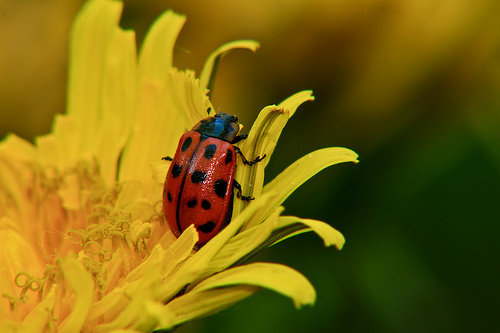

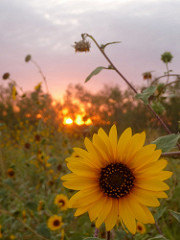

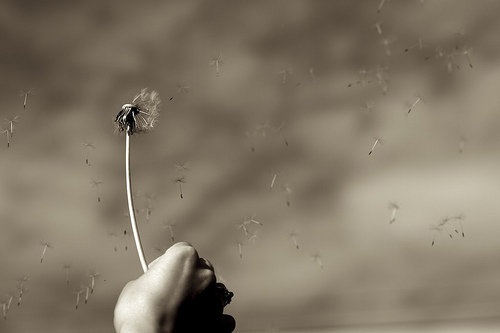

In [37]:
# Visualize the img from path
import IPython.display as display

for n in range(3):
    image_path = random.choice(all_image_paths)
    display.display(display.Image(image_path))
    print()

In [38]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [44]:
label_to_index = dict((name, index) for index, name in enumerate(label_names))
label_to_index

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [46]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                   for path in all_image_paths]

all_image_labels[:10]

[4, 2, 1, 2, 4, 2, 2, 2, 1, 4]

Processing img with TF dataset

In [48]:
img_path = all_image_paths[0]
img_raw = tf.io.read_file(img_path)

In [49]:
# Decode into img tensor

img_tensor = tf.image.decode_jpeg(img_raw, channels=3)

print(img_tensor.shape)
print(img_tensor.dtype)

(239, 240, 3)
<dtype: 'uint8'>


In [50]:
# Resize it

img_final = tf.image.resize(img_tensor, [192, 192])
img_final = img_final/255.0
print(img_final.shape)
print(img_final.dtype)

(192, 192, 3)
<dtype: 'float32'>


In [51]:
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [192, 192])
    image /= 255.0  # normalize to [0,1] range
    image = 2*image-1  # normalize to [-1,1] range

    return image

def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    return preprocess_image(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


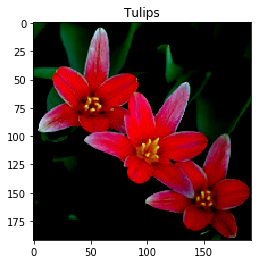

In [52]:
import matplotlib.pyplot as plt

image_path = all_image_paths[0]
label = all_image_labels[0]

plt.imshow(load_and_preprocess_image(image_path))
plt.grid(False)
plt.title(label_names[label].title())
plt.show()

In [56]:
# Slicing the array of strings, results in a dataset of strings:
ds = tf.data.Dataset.from_tensor_slices((all_image_paths, all_image_labels))

# The tuples are unpacked into the positional arguments of the mapped function
def load_and_preprocess_from_path_label(path, label):
    return load_and_preprocess_image(path), label

image_label_ds = ds.map(load_and_preprocess_from_path_label)
image_label_ds

<MapDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int32)>

In [57]:
BATCH_SIZE = 32
AUTOTUNE = tf.data.experimental.AUTOTUNE


# Setting a shuffle buffer size as large as the dataset ensures that the data is
# completely shuffled.
ds = image_label_ds.shuffle(buffer_size=image_count)
ds = ds.repeat()
ds = ds.batch(BATCH_SIZE)
# `prefetch` lets the dataset fetch batches in the background while the model is training.
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

There are a few things to note here:

The order is important.

- A .shuffle after a .repeat would shuffle items across epoch boundaries (some items will be seen twice before others are seen at all).
- A .shuffle after a .batch would shuffle the order of the batches, but not shuffle the items across batches.
- You use a buffer_size the same size as the dataset for a full shuffle. Up to the dataset size, large values provide better randomization, but use more memory.
- The shuffle buffer is filled before any elements are pulled from it. So a large buffer_size may cause a delay when your Dataset is starting.
- The shuffeled dataset doesn't report the end of a dataset until the shuffle-buffer is completely empty. The - Dataset is restarted by .repeat, causing another wait for the shuffle-buffer to be filled.

Let's use a pre-train model and don't include its top.

In [59]:
mobile_net = tf.keras.applications.MobileNetV2(input_shape=(192, 192, 3), include_top=False)
mobile_net.trainable=False

Build a model wrapped around MobileNet and use tf.keras.layers.GlobalAveragePooling2D to average over those space dimensions before the output tf.keras.layers.Dense layer:


In [60]:
model = tf.keras.Sequential([
    mobile_net,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(len(label_names), activation = 'softmax')])

In [61]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

In [62]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_192 (Model) (None, 6, 6, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [63]:
steps_per_epoch=tf.math.ceil(len(all_image_paths)/BATCH_SIZE).numpy()
history = model.fit(ds, epochs=1, steps_per_epoch=steps_per_epoch)

Train for 115.0 steps
Epoch 1/10
  1/115 [..............................] - ETA: 9:17:06

KeyboardInterrupt: 